In [88]:
import pandas as pd

try:
# Cargar los archivos individuales
    df_log = pd.read_csv('../Modelos/Regresion_Logistica/metrics_regresion_logistica.csv')
    df_tree = pd.read_csv('../Modelos/Arbol_Decision/metrics_arbol_decision.csv')
    df_rf = pd.read_csv('../Modelos/Random_Forest/metrics_random_forest.csv')
    df_mlp = pd.read_csv('../Modelos/Redes_Neuronales/metrics_red_neuronal.csv')
except FileNotFoundError as e:
    print(f"Error al cargar los archivos: {e}, asegurate de ejecutar los modelos para tener los archivos de métricas.")
    exit(1)

# Unirlos en un solo DataFrame
df_final = pd.concat([df_log, df_tree, df_rf, df_mlp], ignore_index=True)

# Guardar la comparativa
df_final.to_csv('metrics_finales.csv', index=False)

# Comparación final de los modelos

## Comparación de rendimiento (F1-Score) de todos los modelos:

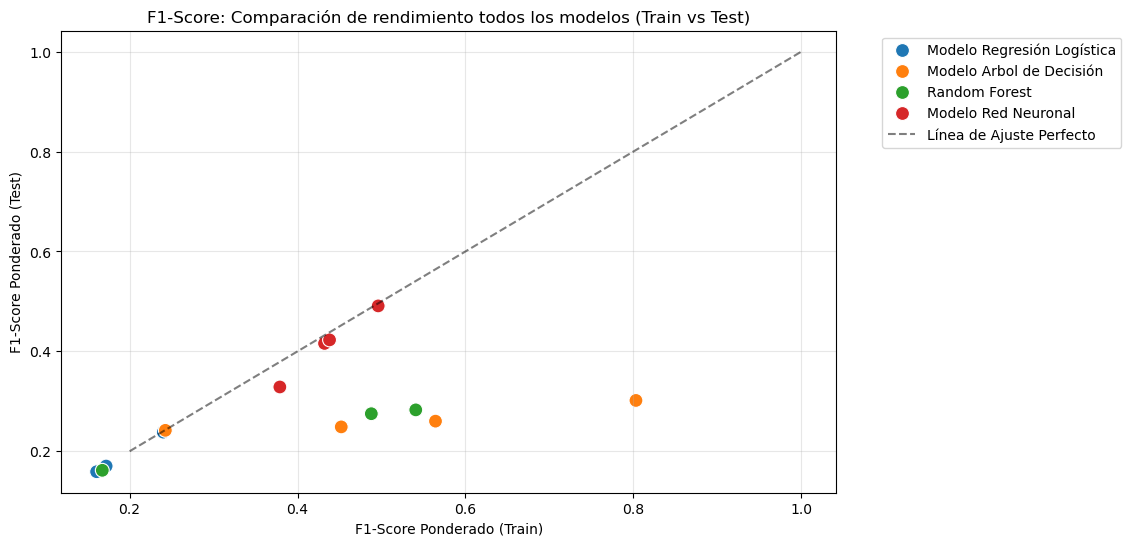

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

df_final["modelo_experimento"] = df_final["modelo"] + " - " + df_final["experimento"]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_final, 
    x='f1_train_avg', 
    y='f1_test_avg', 
    hue='modelo',
    s=100
)
plt.plot([0.2, 1.0], [0.2, 1.0], 'k--', alpha=0.5, label='Línea de Ajuste Perfecto')
plt.title('F1-Score: Comparación de rendimiento todos los modelos (Train vs Test)')
plt.xlabel('F1-Score Ponderado (Train)')
plt.ylabel('F1-Score Ponderado (Test)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True, alpha=0.3)
plt.show()

En este gráfico se puede observar la diferencia de rendimiento basado en F1-Score entre los diferentes tipos de modelos.

Analizando el gráfico podemos sacar las siguientes conclusiones:

1. Los modelos basados en Regresión Logística se quedan muy atrás comparados con la gran mayoría, teniendo un rendimiento aproximado de F1-Score de ≈0.15 tanto en train como en test.

2. Los modelos basados en Random Forest mejoran un poco en train, pasando de un F1-Score de ≈0.15 a un F1-Score de ≈0.5 según aumenta su complejidad, pero su F1-Score de test se estanca en torno a ≈0.25.

3. Los modelos basados en Árbol de Decisión mejoran significativamente en train, pasando de un F1-Score de ≈0.23 a un F1-Score de ≈0.8, pero no mejoran en test, manteniendo un F1-Score de ≈0.3 más o menos.

4. Los modelos de Redes Neuronales mejoran tanto en train como en test, pasando de un F1-Score de ≈0.35 a un F1-Score de ≈0.5.

Aún habiendo sacado estas conclusiones del gráfico, debemos tener en cuenta los problemas que hemos tenido con el desequilibrio de clases al entrenar los modelos, ya que un mejor resultado puede no definir un buen modelo. Por ello, debemos tener en cuenta también los diferentes experimentos que hemos hecho con cada tipo de modelo:

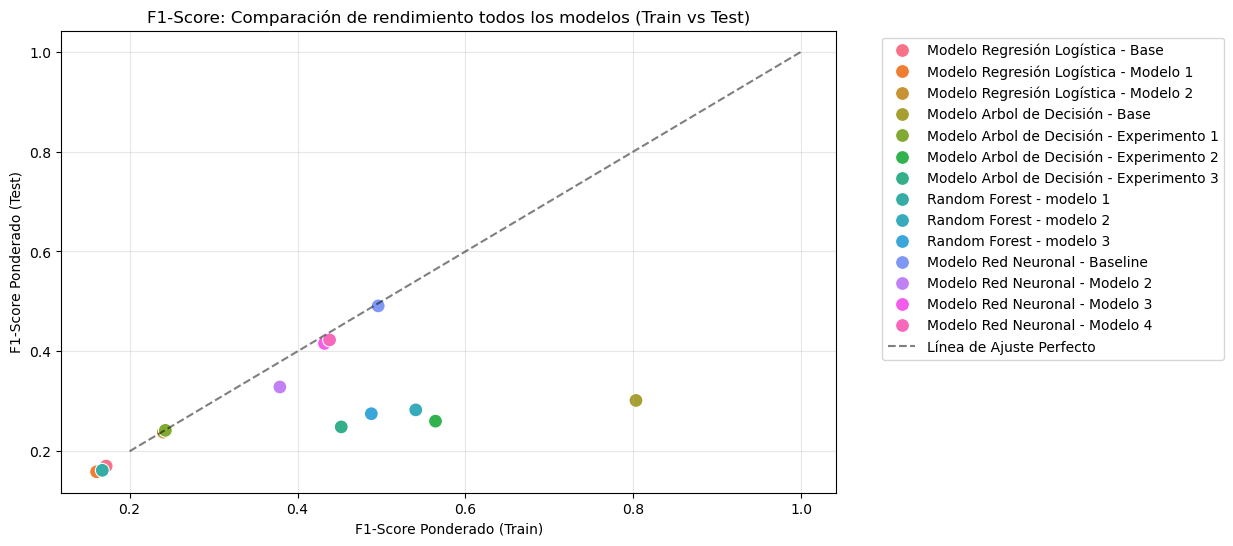

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_final, 
    x='f1_train_avg', 
    y='f1_test_avg', 
    hue='modelo_experimento',
    s=100
)
plt.plot([0.2, 1.0], [0.2, 1.0], 'k--', alpha=0.5, label='Línea de Ajuste Perfecto')
plt.title('F1-Score: Comparación de rendimiento todos los modelos (Train vs Test)')
plt.xlabel('F1-Score Ponderado (Train)')
plt.ylabel('F1-Score Ponderado (Test)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True, alpha=0.3)
plt.show()


Viendo un gráfico que separa cada experimento por su cuenta podemos darnos cuenta de que hay ocasiones en las que los modelos base (sin cambios) dan mejor resultado que los modelos más configurados. Esto es algo que nos puede llevar a pensar que son mejores modelos que los demás, pero en realidad, debido al desequilibrio de clases, el modelo consigue una puntuación alta sin realizar correctamente su cometido, en este caso, la clasificación de las clases. Es decir, el modelo se limita a predecir siempre la clase mayoritaria, y por eso mismo acierta la mayoría de sus predicciones.

De esta manera podemos deducir que los modelos base no cumplirían nuestra necesidad y podemos descartarlos.

Ahora que hemos descartado los modelos que sufren de un sesgo importante hacia alguna clase del conjunto de datos, nuestro siguiente problema principal sería el sobreajuste u Overfitting, que hace que nuestros modelos no generalicen las relaciones que aprenden en los datos de train sobre los datos de test:

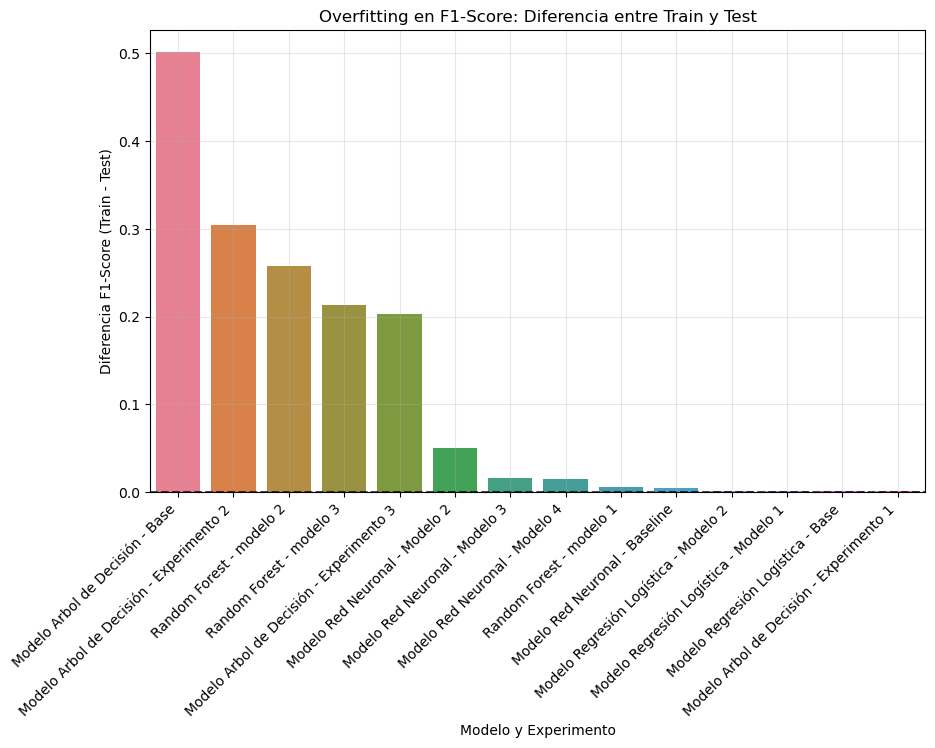

In [91]:

df_final['overfitting_f1'] = df_final['f1_train_avg'] - df_final['f1_test_avg']
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_final.sort_values(by='overfitting_f1', ascending=False),
    x='modelo_experimento', 
    y='overfitting_f1', 
    hue='modelo_experimento',
)
plt.axhline(0, color='k', linestyle='--', alpha=0.7)
plt.title('Overfitting en F1-Score: Diferencia entre Train y Test')
plt.xlabel('Modelo y Experimento')
plt.ylabel('Diferencia F1-Score (Train - Test)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.show()


En este gráfico podemos ver la diferencia entre la puntuación F1-Score en train y test de los diferentes experimentos y modelos. En el mismo podemos observar que la curva baja rápidamente en los cinco primeros experimentos y posteriormente se estabiliza en un valor bajo para los siguientes nueve.

Los modelos que más overfitting tienen son Árboles de Decisión o Random Forest.

Para hacernos una mejor idea de la viabilidad de los modelos, podemos comparar el sobreajuste (overfitting) de cada uno de ellos con su puntuación de F1-Score para poder elegir un modelo que no tenga un sesgo claro y nos proporcione una mejor generalización:

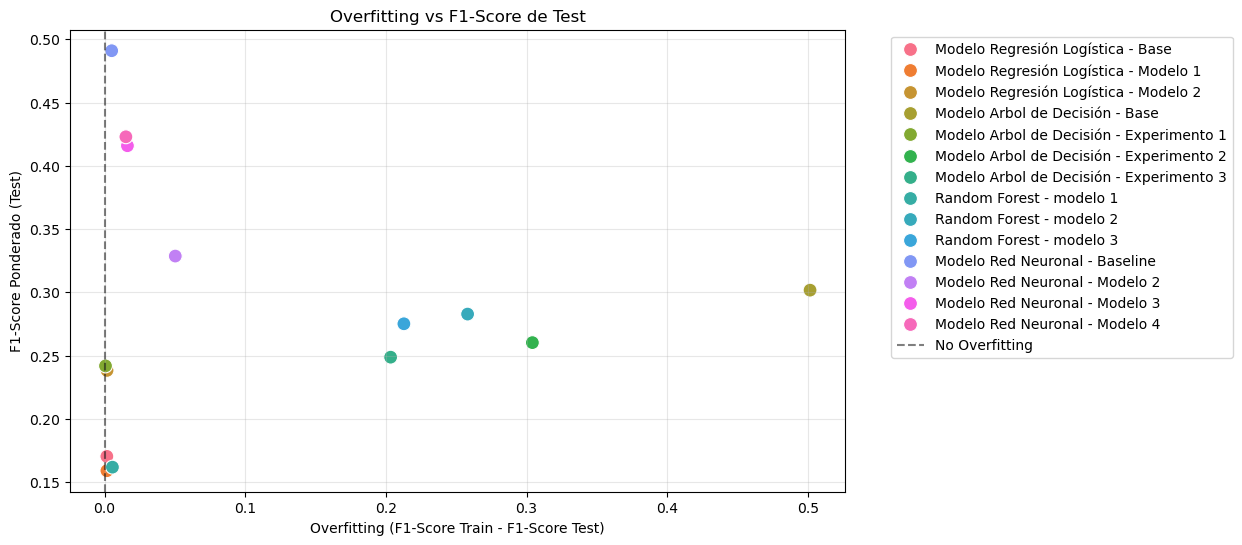

In [92]:
#mostar overfitting y f1-score al lado
df_final['overfitting'] = df_final['f1_train_avg'] - df_final['f1_test_avg']
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_final, 
    x='overfitting', 
    y='f1_test_avg', 
    hue='modelo_experimento',
    s=100
)
plt.axvline(0, color='k', linestyle='--', alpha=0.5, label='No Overfitting')
plt.title('Overfitting vs F1-Score de Test')
plt.xlabel('Overfitting (F1-Score Train - F1-Score Test)')
plt.ylabel('F1-Score Ponderado (Test)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True, alpha=0.3)
plt.show()

Este gráfico nos permite una buena visualización de sobreajuste (Overfitting) versus F1-Score en test para poder elegir un modelo entre todos los que hemos entrenado.

Tras analizar el gráfico podemos concluir que los modelos que mejor F1-Score tienen y presentan menos sobreajuste son las Redes Neuronales. Aun así hay que recordar el problema de sesgo por clase mencionado anteriormente y debemos descartar el modelo base de Redes Neuronales.

In [93]:
#crear una tabla con las metricas de los modelos
tabla_metricas = df_final[['modelo', 'experimento', 'accuracy_train', 'accuracy_test', 'recall_train_avg', 'recall_test_avg', 'f1_train_avg', 'f1_test_avg', 'tiempo_entrenamiento_seg']]
tabla_metricas.sort_values(by='f1_test_avg', ascending=False)

,modelo,experimento,accuracy_train,accuracy_test,recall_train_avg,recall_test_avg,f1_train_avg,f1_test_avg,tiempo_entrenamiento_seg
10,Modelo Red Neuronal,Baseline,0.626258,0.622763,0.626258,0.622763,0.496097,0.491008,60.466440
13,Modelo Red Neuronal,Modelo 4,0.409199,0.384485,0.409199,0.384485,0.438163,0.422978,167.637489
12,Modelo Red Neuronal,Modelo 3,0.403517,0.376611,0.403517,0.376611,0.432187,0.415902,172.587922
11,Modelo Red Neuronal,Modelo 2,0.359134,0.289817,0.359134,0.289817,0.378969,0.328690,86.148270
3,Modelo Arbol de Decisión,Base,0.859894,0.503221,0.788931,0.304195,0.803183,0.301740,0.236313
8,Random Forest,modelo 2,0.552230,0.376790,0.552230,0.385712,0.540875,0.282828,939.043549
9,Random Forest,modelo 3,0.500560,0.356389,0.500560,0.390777,0.487927,0.275157,684.460684
5,Modelo Arbol de Decisión,Experimento 2,0.599794,0.346815,0.785455,0.323362,0.564374,0.260271,40.619973
6,Modelo Arbol de Decisión,Experimento 3,0.491812,0.316750,0.680546,0.334063,0.452096,0.248760,103.464675
4,Modelo Arbol de Decisión,Experimento 1,0.276274,0.278096,0.384147,0.382488,0.242566,0.241872,20.444402


# Conclusión

Finalmente podemos concluir el análisis de los modelos eligiendo el Modelo 4 de Redes Neuronales (muy parecido al Modelo 3) que implementa una técnica SMOTETomek para el desequilibrio de clases y nos permite generalizar mejor que muchos de los otros modelos, consiguiendo también un resultado mejor que los demás.

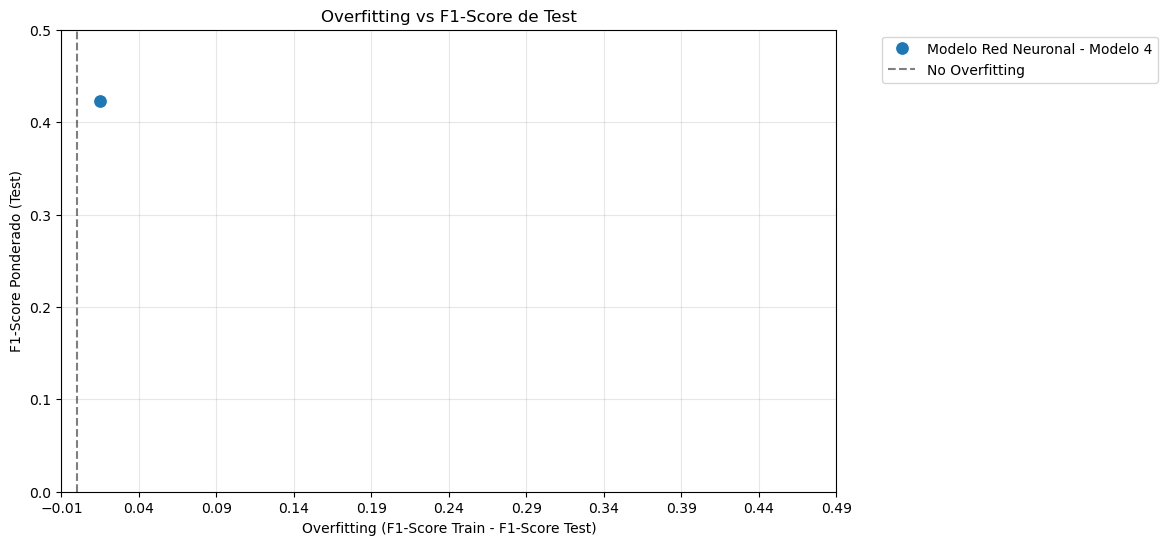

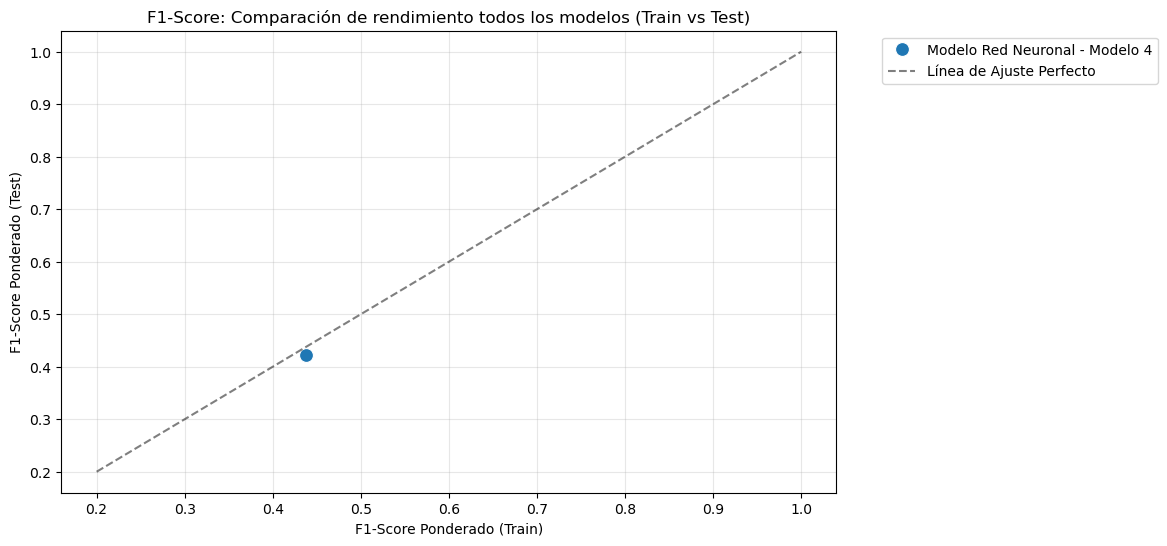

,modelo,experimento,accuracy_train,accuracy_test,recall_train_avg,recall_test_avg,f1_train_avg,f1_test_avg,tiempo_entrenamiento_seg
0,Modelo Red Neuronal,Modelo 4,0.409199,0.384485,0.409199,0.384485,0.438163,0.422978,167.637489


In [107]:
#graficos para el Modelo 4 de Redes Neuronales
modelo_elegido = df_final[df_final['modelo_experimento'] == 'Modelo Red Neuronal - Modelo 4']
#mostar overfitting y f1-score al lado
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=modelo_elegido, 
    x='overfitting', 
    y='f1_test_avg', 
    hue='modelo_experimento',
    s=100
)
plt.axvline(0, color='k', linestyle='--', alpha=0.5, label='No Overfitting')
plt.title('Overfitting vs F1-Score de Test')
plt.xlabel('Overfitting (F1-Score Train - F1-Score Test)')
plt.ylabel('F1-Score Ponderado (Test)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks([x/100 for x in range(-1, 50, 5)])
plt.yticks([x/10 for x in range(0, 6, 1)])

plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=modelo_elegido, 
    x='f1_train_avg', 
    y='f1_test_avg', 
    hue='modelo_experimento',
    s=100
)
plt.plot([0.2, 1.0], [0.2, 1.0], 'k--', alpha=0.5, label='Línea de Ajuste Perfecto')
plt.title('F1-Score: Comparación de rendimiento todos los modelos (Train vs Test)')
plt.xlabel('F1-Score Ponderado (Train)')
plt.ylabel('F1-Score Ponderado (Test)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True, alpha=0.3)
plt.show()

# mostrar tabla de metricas del modelo elegido
tabla_metricas_elegido = modelo_elegido[['modelo', 'experimento', 'accuracy_train', 'accuracy_test', 'recall_train_avg', 'recall_test_avg', 'f1_train_avg', 'f1_test_avg', 'tiempo_entrenamiento_seg']]
# quitar el indice
tabla_metricas_elegido.reset_index(drop=True, inplace=True)
tabla_metricas_elegido
